In [1]:
import pandas as pd

data = pd.read_parquet("splunk_agg_data_24-05-05__24-07-23.parquet")

data = data.dropna()

# filter data from 24-05-05 11:00:00 to 24-05-05 12:00:00
data = data[
    (data["time"] >= "2024-05-05 11:00:00") & (data["time"] <= "2024-05-05 16:00:00")
]

data_subset = data[
    ["request_amount", "error_count"]
]
data_time = data["time"]

(<Figure size 640x480 with 2 Axes>,
 array([<Axes: ylabel='request_amount'>, <Axes: ylabel='error_count'>],
       dtype=object))

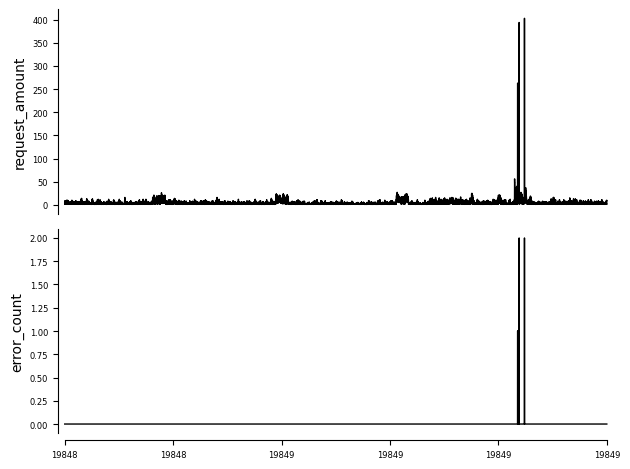

In [2]:
from tigramite import data_processing as pp
from tigramite import plotting as tp

dataframe = pp.DataFrame(data_subset.values, var_names=data_subset.columns, datatime=data_time.values)

tp.plot_timeseries(dataframe)

In [3]:
from tigramite.lpcmci import LPCMCI
from tigramite.independence_tests.gsquared import Gsquared

cond_ind_test = Gsquared()
lpcmci = LPCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test, verbosity=1)
tau_max = 10

results = lpcmci.run_lpcmci(tau_max=tau_max)


Starting preliminary phase  1

Starting test phase

p = 0
(1,-8) independent (1, 0) given () union set()
(1,-7) independent (1, 0) given () union set()
(1,-6) independent (1, 0) given () union set()
(1,-5) independent (1, 0) given () union set()
(1,-4) independent (1, 0) given () union set()
(1,-3) independent (1, 0) given () union set()
(1,-1) independent (1, 0) given () union set()
Writing:   (1,-8) oL> (1, 0) ==> (1,-8)     (1, 0) 
Writing:   (1,-7) oL> (1, 0) ==> (1,-7)     (1, 0) 
Writing:   (1,-6) oL> (1, 0) ==> (1,-6)     (1, 0) 
Writing:   (1,-5) oL> (1, 0) ==> (1,-5)     (1, 0) 
Writing:   (1,-4) oL> (1, 0) ==> (1,-4)     (1, 0) 
Writing:   (1,-3) oL> (1, 0) ==> (1,-3)     (1, 0) 
Writing:   (1,-1) oL> (1, 0) ==> (1,-1)     (1, 0) 
(0,-1) independent (1, 0) given () union set()
(1,-1) independent (0, 0) given () union set()
Writing:   (1,-1) oL> (0, 0) ==> (1,-1)     (0, 0) 
Writing:   (0,-1) oL> (1, 0) ==> (0,-1)     (1, 0) 
(0,-2) independent (1, 0) given () union set()
(1,

(<Figure size 600x600 with 1 Axes>, <Axes: >)

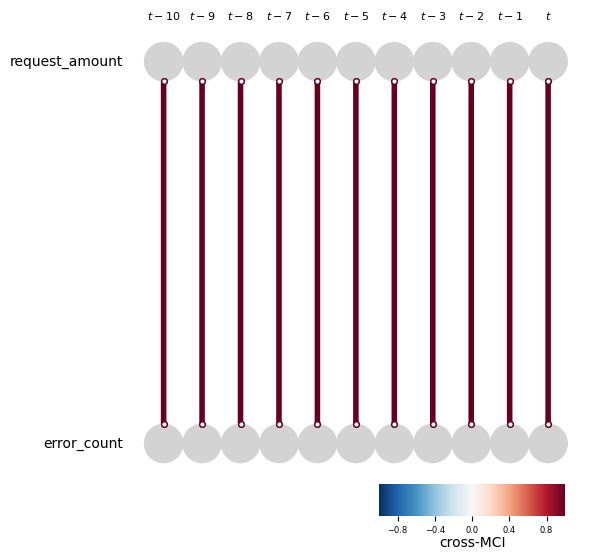

In [6]:
tp.plot_time_series_graph(
    figsize=(6, 6),
    val_matrix=results["val_matrix"],
    graph=results["graph"],
    var_names=data_subset.columns,
    link_colorbar_label="cross-MCI",
)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

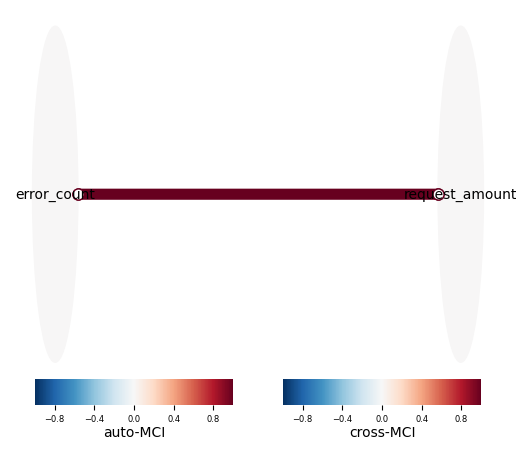

In [7]:
tp.plot_graph(
    val_matrix=results["val_matrix"],
    graph=results["graph"],
    var_names=data_subset.columns,
    link_colorbar_label="cross-MCI",
    node_colorbar_label="auto-MCI",
)